# Topic distribution

Using the bag of words (dictionary) and topic models generated from the corpus, I now use them to project publications in the LDA topic space, as well as for the individuals in the School

## Setup

In [1]:
import pandas as pd
import numpy as np
import cPickle as pkl

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random.RandomState(1234567)

In [3]:
from gensim import models
from gensim.corpora import Dictionary

In [4]:
from sklearn import manifold
from sklearn.cluster import DBSCAN

In [5]:
import seaborn as sns

In [6]:
## TRYING WITH HDBSCAN:  http://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html
from hdbscan import HDBSCAN 

In [48]:
def inference(ldaModel, entry):
    num_topics = ldaModel.num_topics
    topic_dist = ldaModel[entry.bow]
    # index the topic_distribution according to the distribution:
    out = [0.] * num_topics
    for (i,v) in topic_dist:
        out[i] = v
    return out

def best_topic(topic_dist):
    """
    Assign the pulbication with the topic that best describes it;
    this is equivalent to the index that have the highest topic_distribution
    """
    a = np.argmax(topic_dist)
    assert a < 20
    assert a >= 0
    return a

In [8]:
lookup_pub = pkl.load(open('../data/lookup_pub.pkl', 'rb'))
lookup_poinf = pkl.load(open('../data/lookup_poinf.pkl','rb'))

# Full Model - Publications

In [9]:
# Load Dictionary to convert words to id:
dictionary_fullpub = pkl.load(open('../data/dictionary_fullpub.pkl','rb'))
pub_toks_fullpub = pkl.load(open('../data/pub_toks_wBOW_fullpub.pkl', 'rb'))

In [11]:
# load the LDA model:
fullpubLDA = models.LdaModel.load('../data/fullpub.ldamodel')

In [15]:
sample = pub_toks_fullpub.iloc[3]

In [49]:
_inference = lambda row: inference(fullpubLDA, row)
pub_toks_fullpub['topic_distribution'] = pub_toks_fullpub.apply(_inference, axis=1)

In [40]:
pub_toks_fullpub.head(4)

year  \
pub_id                                       
400818dc-63af-4a26-80c5-906f98e1f8ab  1989   
18b1a861-afef-4fff-bc80-d02e05be18c4  2013   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  1994   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  2012   

                                                                                  title  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  ballooning stability analysis of jet hmode dis...   
18b1a861-afef-4fff-bc80-d02e05be18c4               query processing in data integration   
309fdbfc-227b-4588-9264-f0f4e3cadfcb                               comprehension syntax   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  evaluation of speaker verification security an...   

                                                                               abstract  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  previous studies of the stability of a large a...   
18b1a861-afef-4fff-bc80-d02e05be18c4  in this chapter we illustrate the main techniq...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  the syntax of comprehensions is very close to ...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  in this paper, we evaluate the vulnerability o...   

                                                                           publications  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab   proceedings 16th european conference on contr...   
18b1a861-afef-4fff-bc80-d02e05be18c4  data exchange, integration, and streams,dagstu...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb                                      sigmod record   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  ieee transactions on audio, speech and languag...   

                                                                                summary  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  ballooning stability analysis of jet hmode dis...   
18b1a861-afef-4fff-bc80-d02e05be18c4  query processing in data integration in this c...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  comprehension syntax the syntax of comprehensi...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  evaluation of speaker verification security an...   

                                                                           summary_toks  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [balloon, stabil, analysi, jet, hmode, dischar...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [queri, process, data, integr, chapter, illust...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [comprehens, syntax, syntax, comprehens, close...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [evalu, speaker, verif, secur, detect, hmmbase...   

                                                                                    bow  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [(145, 1), (211, 2), (279, 2), (308, 1), (451,...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [(217, 1), (241, 1), (300, 2), (309, 1), (364,...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [(80, 3), (113, 1), (177, 5), (184, 1), (321, ...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [(16, 1), (25, 1), (26, 2), (27, 1), (54, 1), ...   

                                                                     topic_distribution  
pub_id                                                                                   
400818dc-63af-4a26-80c5-906f98e1f8ab  [0.0, 0.639784318994, 0.0, 0.150040376627, 0.0...  
18b1a861-afef-4fff-bc80-d02e05be18c4  [0.0, 0.0, 0.368139197452, 0.0, 0.0, 0.0, 0.04...  
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048...  
d5814bab-5fc2-4c31-92b7-543c7

In [41]:
pub_toks_fullpub['best_topic'] = pub_toks_fullpub.apply(
    lambda row: best_topic(row.topic_distribution), axis=1)

In [42]:
pub_toks_fullpub.head(4)

year  \
pub_id                                       
400818dc-63af-4a26-80c5-906f98e1f8ab  1989   
18b1a861-afef-4fff-bc80-d02e05be18c4  2013   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  1994   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  2012   

                                                                                  title  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  ballooning stability analysis of jet hmode dis...   
18b1a861-afef-4fff-bc80-d02e05be18c4               query processing in data integration   
309fdbfc-227b-4588-9264-f0f4e3cadfcb                               comprehension syntax   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  evaluation of speaker verification security an...   

                                                                               abstract  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  previous studies of the stability of a large a...   
18b1a861-afef-4fff-bc80-d02e05be18c4  in this chapter we illustrate the main techniq...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  the syntax of comprehensions is very close to ...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  in this paper, we evaluate the vulnerability o...   

                                                                           publications  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab   proceedings 16th european conference on contr...   
18b1a861-afef-4fff-bc80-d02e05be18c4  data exchange, integration, and streams,dagstu...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb                                      sigmod record   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  ieee transactions on audio, speech and languag...   

                                                                                summary  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  ballooning stability analysis of jet hmode dis...   
18b1a861-afef-4fff-bc80-d02e05be18c4  query processing in data integration in this c...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  comprehension syntax the syntax of comprehensi...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  evaluation of speaker verification security an...   

                                                                           summary_toks  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [balloon, stabil, analysi, jet, hmode, dischar...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [queri, process, data, integr, chapter, illust...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [comprehens, syntax, syntax, comprehens, close...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [evalu, speaker, verif, secur, detect, hmmbase...   

                                                                                    bow  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [(145, 1), (211, 2), (279, 2), (308, 1), (451,...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [(217, 1), (241, 1), (300, 2), (309, 1), (364,...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [(80, 3), (113, 1), (177, 5), (184, 1), (321, ...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [(16, 1), (25, 1), (26, 2), (27, 1), (54, 1), ...   

                                                                     topic_distribution  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [0.0, 0.639784318994, 0.0, 0.150040376627, 0.0...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [0.0, 0.0, 0.368139197452, 0.0, 0.0, 0.0, 0.04...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048...   
d5814bab-5fc2-4c31-92b7-

## Visualisation

We can visualise the data in 2D, and color each publication based on the most salient topic it is on:

### `TSNE`

Here, use the `manifold` package from sklearn to reduce the dimensionality of the data for visualisation.
For coloring, use the topic that gives the highest probability

In [55]:
x_components = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data)

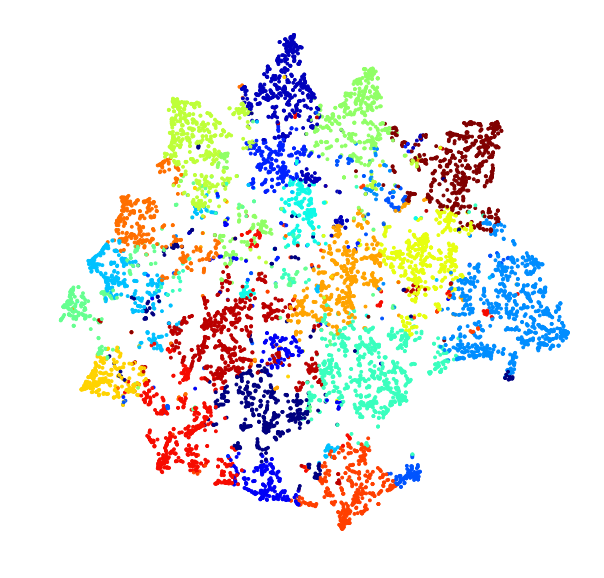

In [57]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

### `MDS`

In [218]:
# Multidimensional Scaling
mds_components = manifold.MDS(n_components=2, random_state=rng).fit_transform(data)

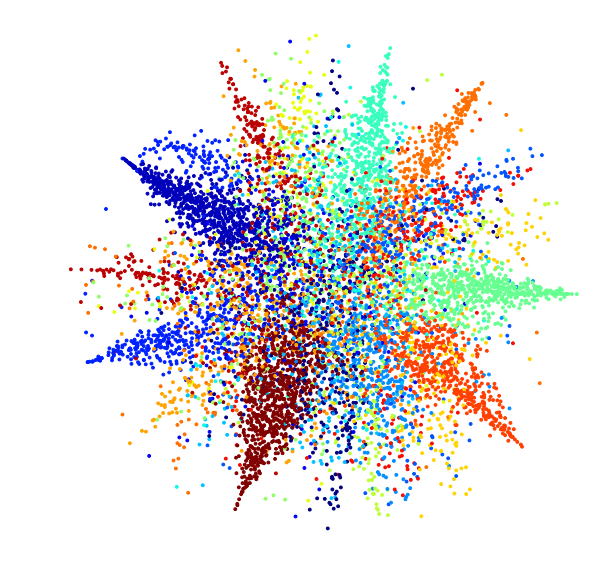

In [219]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(mds_components[:,0], mds_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

While the colors of the publications are based on the topic the publication is salient on (from the LDA), we make no assumption that these are the clusters that are being used. 

Hence, now we use some clustering algorithm to cluster our data such that we can color them accordingly. In our clustering algorithms, we have 20 clusters as well, similar to the topics.

## Clustering

In [50]:
## Our dataset will be the topic_distribution:
data = pub_toks_fullpub.topic_distribution.values

In [54]:
# Convert the lists to array so that it can be used for sklearn.manifold
data = map(np.asarray, data)

### KMeans

In [58]:
from sklearn.cluster import KMeans

####  `n_cluster = 20`

In [59]:
kmeansClustering = KMeans(n_clusters=20).fit_predict(data)

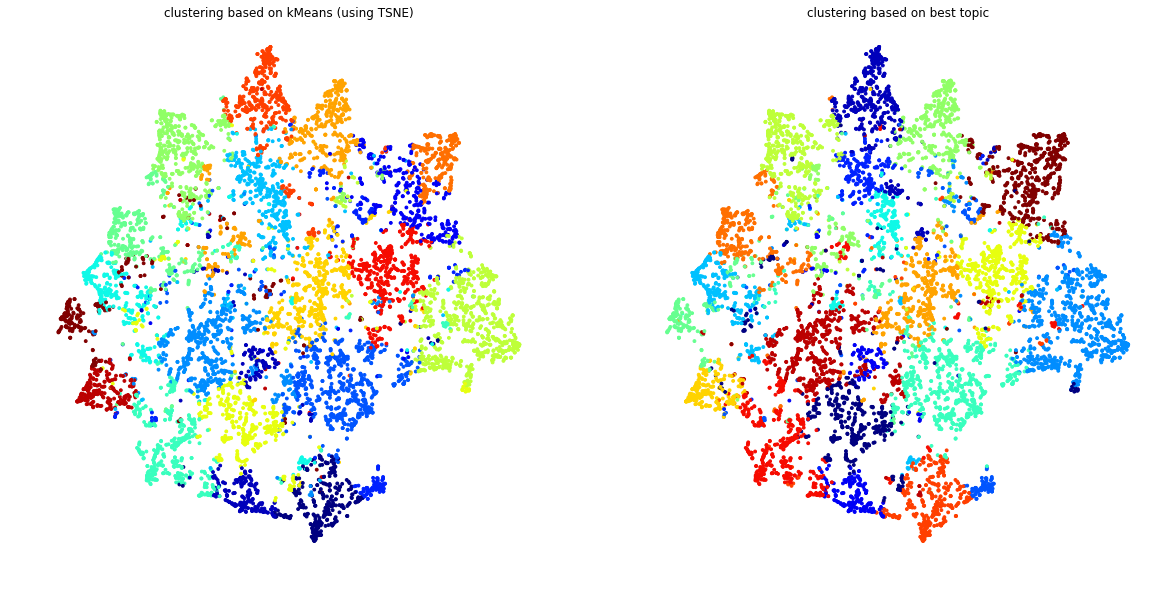

In [60]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

In [ ]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax.scatter(mds_components[:,0], mds_components[:,1], c=kmeansClustering, cmap=plt.cm.jet, s=20)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('Clustering baed on kMeans (mds)')

ax2 = f.add_subplot(122)
ax2.scatter(mds_components[:,0], mds_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=20)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('Clustering based on best_topic (mds)')
plt.show()
plt.show()

#### `n_cluster = 30`

In [61]:
kmeansClustering30 = KMeans(n_clusters=30).fit_predict(data)

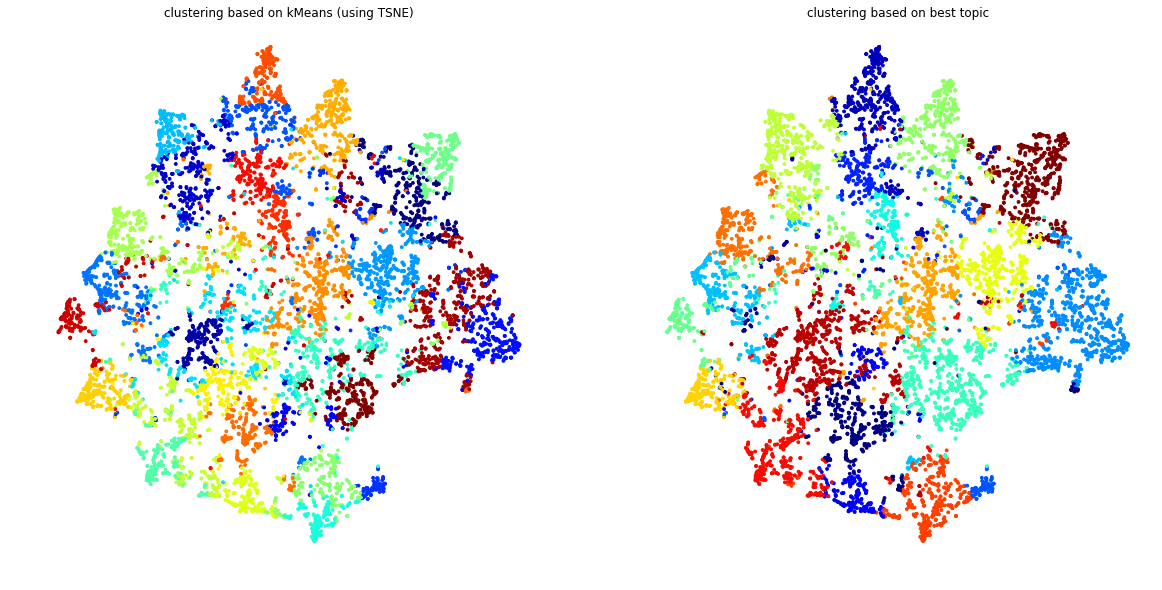

In [62]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=kmeansClustering30,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

#### `n_cluster = 10`

In [63]:
kmeansClustering10 = KMeans(n_clusters=10).fit_predict(data)

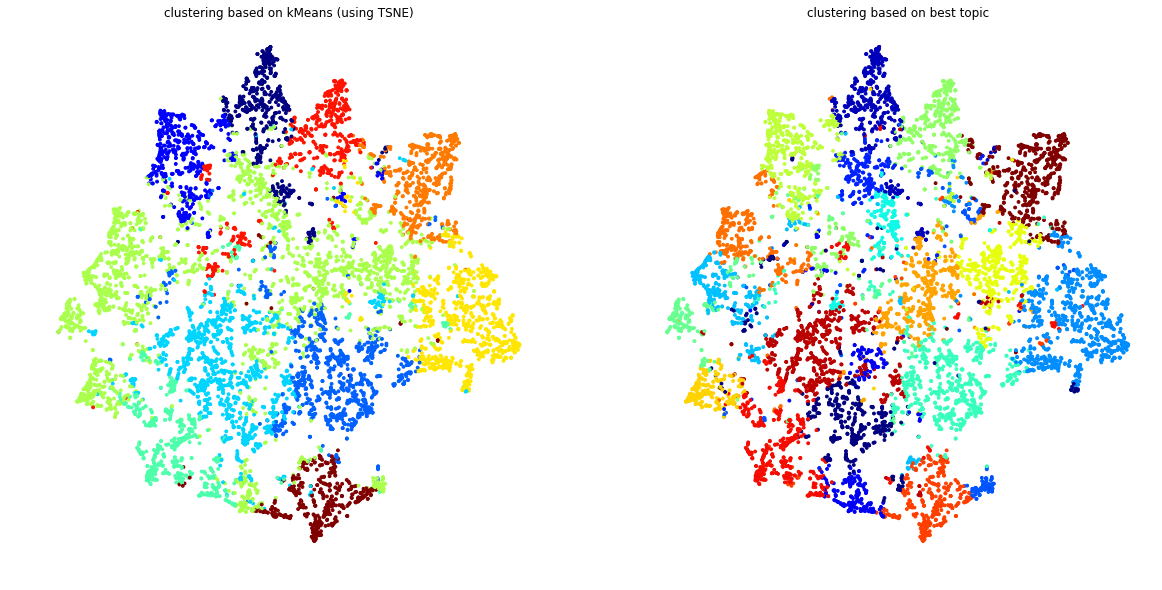

In [64]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=kmeansClustering10,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

### DBScan

#### Using full data (20 dim)

In [65]:
dbscan_pub = DBSCAN().fit(data)

In [66]:
dbscan_clusters = dbscan_pub.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 1


#### Using TSNE projection

In [67]:
dbscan_pub = DBSCAN().fit(x_components)

In [68]:
dbscan_clusters = dbscan_pub.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 218


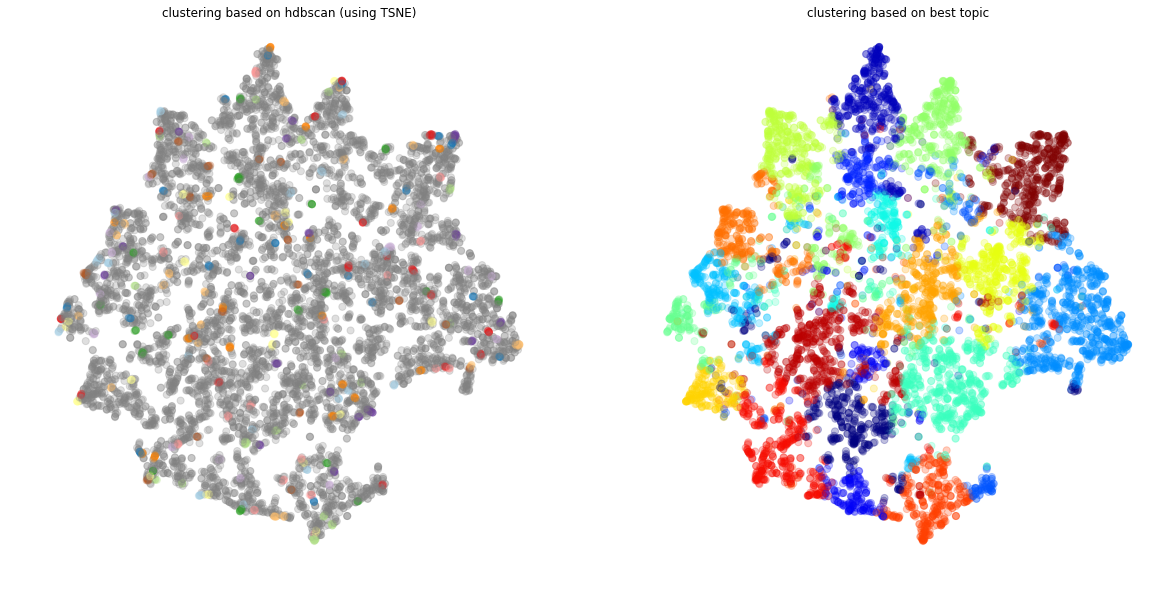

In [70]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('Paired', 219)
cluster_colors = [
    color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in dbscan_clusters
]
ax.scatter(
    x_components[:, 0], x_components[:, 1], c=cluster_colors, s=50, alpha=.25)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on hdbscan (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

### HDBSCAN

In [71]:
from hdbscan import HDBSCAN
import hdbscan

In [72]:
hdbscan_cluster = HDBSCAN().fit(data)

In [73]:
n_clusters_ = len(set(hdbscan_cluster.labels_)) - (1 if -1 in hdbscan_cluster.labels_ else 0)
print 'number of clusters:', n_clusters_

number of clusters: 101


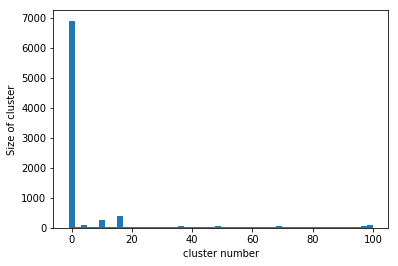

In [75]:
f = plt.figure()
ax = f.add_subplot(111)
ax.hist(hdbscan_cluster.labels_,bins=50);
ax.set_xlabel('cluster number')
ax.set_ylabel('Size of cluster')
plt.show()

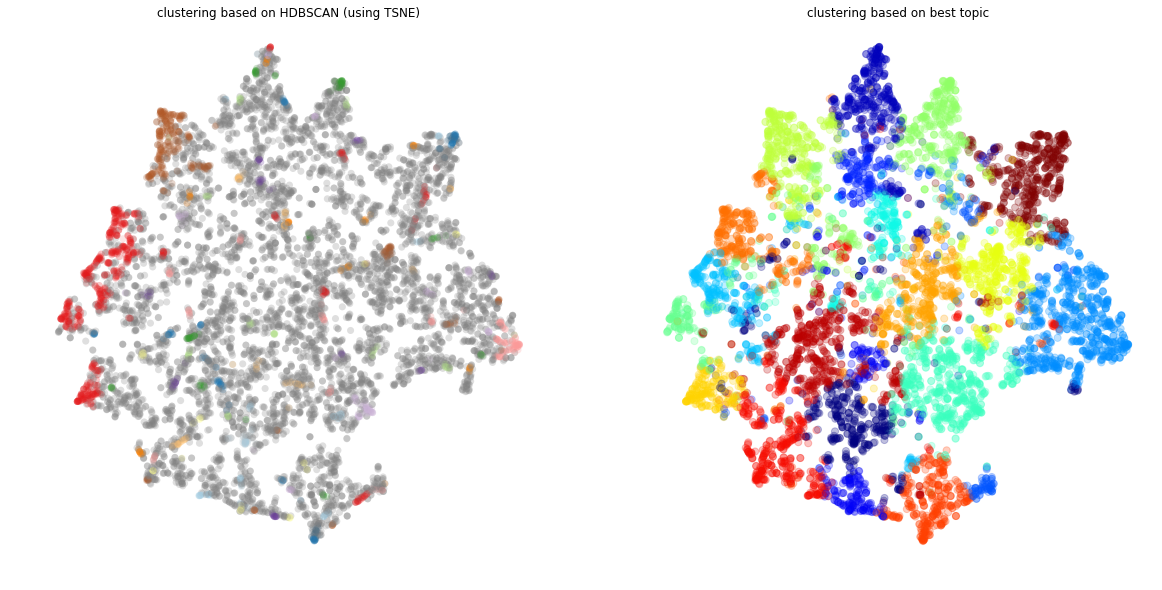

In [77]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('Paired', 102)
cluster_colors = [
    color_palette[x] if x >= 0 else (0.5, 0.5, 0.5)
    for x in hdbscan_cluster.labels_
]
#  colors weighted according to te probability of being in the cluster
cluster_member_colors = [
    sns.desaturate(x, p)
    for x, p in zip(cluster_colors, hdbscan_cluster.probabilities_)
]
ax.scatter(
    *x_components.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on HDBSCAN (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

### Soft clustering in HDBSCAN*

In [78]:
clusterer = HDBSCAN(prediction_data=True).fit(data)

In [79]:
n_clusters_ = len(set(hdbscan_cluster.labels_)) - (1 if -1 in hdbscan_cluster.labels_ else 0)
print 'number of clusters:', n_clusters_

number of clusters: 101


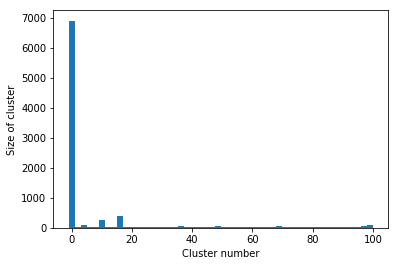

In [81]:
f = plt.figure()
ax = f.add_subplot(111)
ax.hist(clusterer.labels_,bins=50);
ax.set_xlabel('Cluster number')
ax.set_ylabel('Size of cluster')
plt.show()

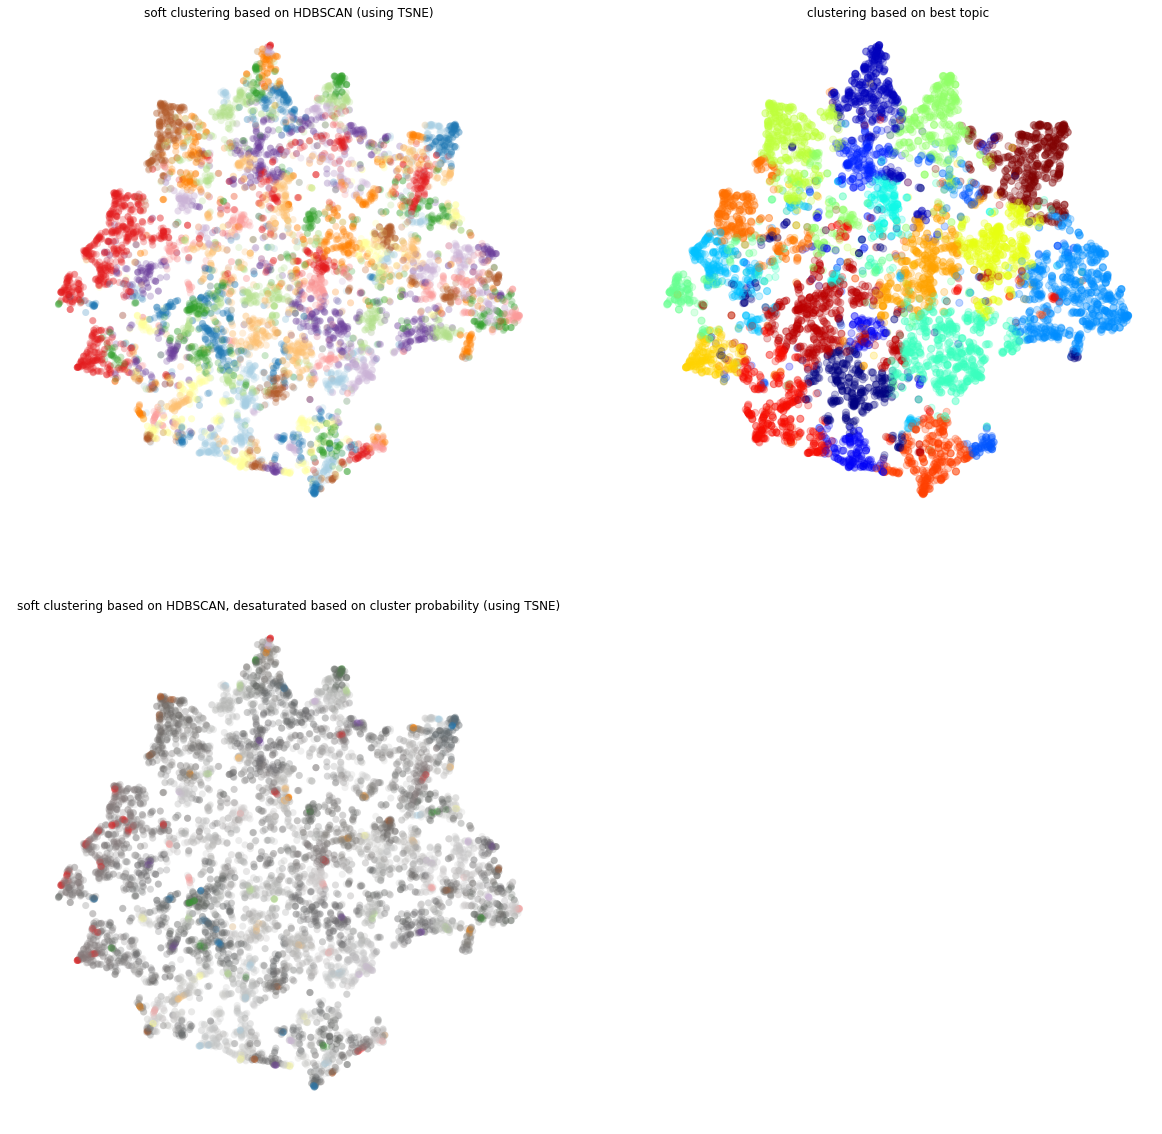

In [82]:
f = plt.figure(figsize=(20, 20))
ax = f.add_subplot(221)

soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 102)
cluster_colors = [color_palette[np.argmax(x)] for x in soft_clusters]
ax.scatter(*x_components.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('soft clustering based on HDBSCAN (using TSNE)')
ax2 = f.add_subplot(222)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks_fullpub.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

ax3 = f.add_subplot(223)
cluster_colors = [
    sns.desaturate(color_palette[np.argmax(x)], np.max(x))
    for x in soft_clusters
]
ax3.scatter(*x_components.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
ax3.axis('off')
ax3.set_title(
    'soft clustering based on HDBSCAN, desaturated based on cluster probability (using TSNE)'
)
plt.show()

# Model 2: 2012-2017 (6yr infnet)

In [87]:
pub_toks_6yr = pkl.load(open('../data/pub_toks_wBOW_6yr.pkl','rb'))
dictionary_6yr = pkl.load(open('../data/dictionary_6yr.pkl', 'rb'))
# load the LDA model:
lda_6yr = models.LdaModel.load('../data/6yr.ldamodel')

In [90]:
# Add in the infered topics
_inference = lambda row: inference(lda_6yr, row)
pub_toks_6yr['topic_distribution'] = pub_toks_6yr.apply(_inference, axis=1)

In [91]:
# best topic for coloring
pub_toks_6yr['best_topic'] = pub_toks_6yr.apply(
    lambda row: best_topic(row.topic_distribution), axis=1)

In [92]:
len(pub_toks_6yr)

3574

In [97]:
## Our dataset will be the topic_distribution:
data_6yr = pub_toks_6yr.topic_distribution.values
# Convert the lists to array so that it can be used for sklearn.manifold
data_6yr = map(np.asarray, data_6yr)

## Visualisation

In [98]:
# TSNE
tsne_6yr_components = manifold.TSNE(
    n_components=2, init='pca', random_state=rng).fit_transform(data_6yr)
# # Multidimensional Scaling
# mds_6yr_component = manifold.MDS(n_components=2, random_state=rng).fit_transform(data_6yr)

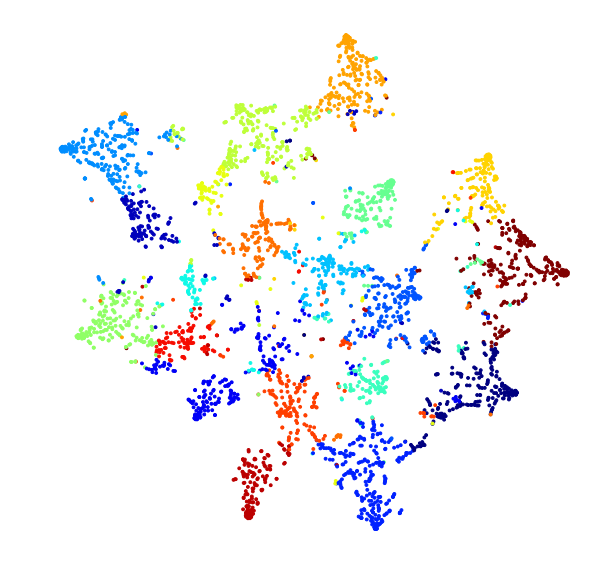

In [99]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=list(pub_toks_6yr.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

## Clustering

### KMeans

####  `n_cluster = 20`

In [100]:
kmeansClustering = KMeans(n_clusters=20).fit_predict(data_6yr)

In [102]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=list(pub_toks_6yr.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

#### `n_cluster = 30`

In [103]:
kmeansClustering30 = KMeans(n_clusters=30).fit_predict(data_6yr)

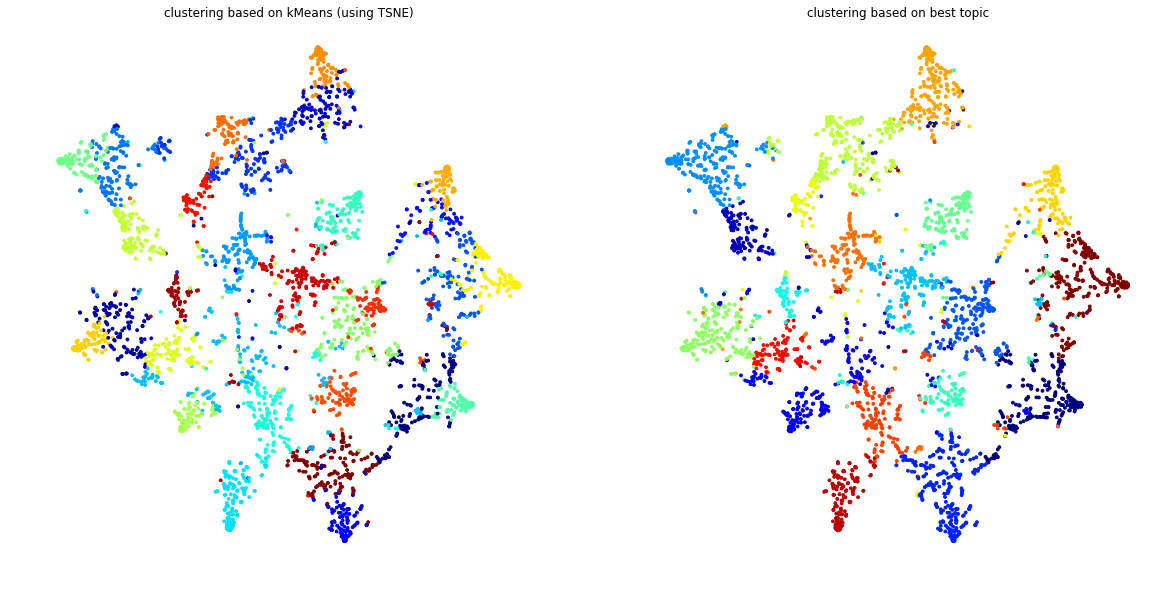

In [104]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=kmeansClustering30,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=list(pub_toks_6yr.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

#### `n_cluster = 10`

In [105]:
kmeansClustering10 = KMeans(n_clusters=10).fit_predict(data_6yr)

In [106]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=kmeansClustering10,
    cmap=plt.cm.jet,
    s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    tsne_6yr_components[:, 0],
    tsne_6yr_components[:, 1],
    c=list(pub_toks_6yr.best_topic),
    cmap=plt.cm.jet,
    s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()